In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
from qcostas import generate_costas, plot_costas

In [2]:
n = 3

costas_result = generate_costas(n)
N = costas_result.N
M = costas_result.M
r = costas_result.r
permutation = costas_result.permutation
is_costas = costas_result.is_costas
grover = costas_result.grover
problem = costas_result.problem
result = costas_result.result

print("Found permutation:", permutation, "Costas?", is_costas)

Found permutation: [1, 3, 2] Costas? True


n=3, N=64, M=4, Grover iters≈3, classical avg≈16 guesses


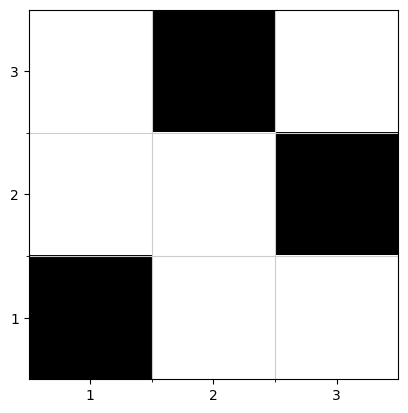

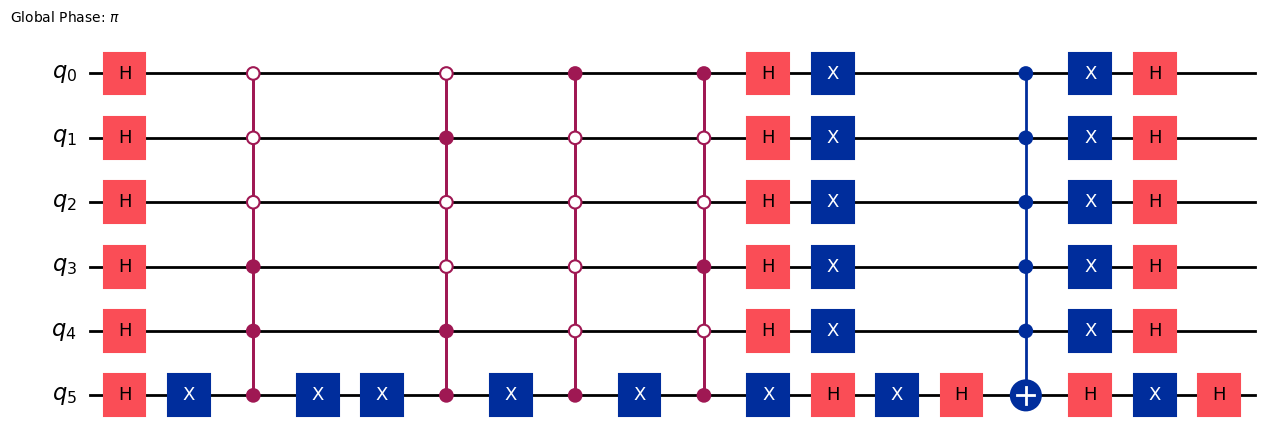

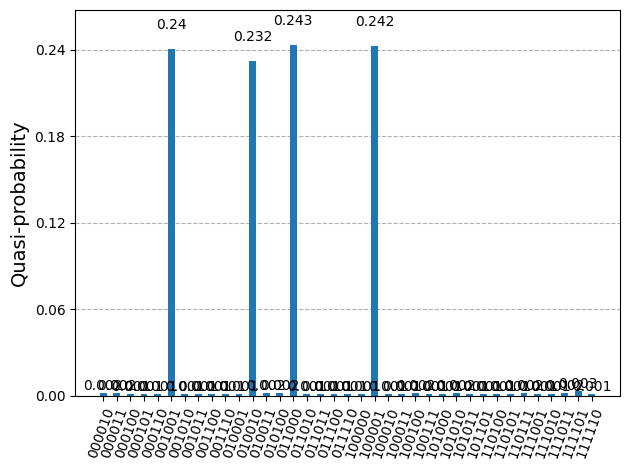

In [3]:
print(f"n={n}, N={N}, M={M}, Grover iters≈{r}, classical avg≈{N//M} guesses")

plot_costas(permutation)
grover.construct_circuit(problem=problem, power=1).decompose(
    gates_to_decompose=["Q", "CostasOracle"], reps=3
).draw("mpl", fold=-1)
plot_histogram(result.circuit_results)
plt.show()